In [1]:
suppressMessages(library(topGO))
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))
suppressMessages(library(ggpubr))




In [2]:
barplot <- function(df, showCategory=15){
  df <- df[with(df, order(ratio, padj, decreasing = c(TRUE, FALSE))),]
  df <- head(df, n=showCategory)
  breaks <- round( c(0, 1/4, 2/4, 3/4, 1) * max(df[['ratio']]) , 2)
  p_plot <- ggplot(df, aes_string(x="term", y="ratio", fill="padj")) +
                  geom_col() +
                  scale_y_continuous(expand=c(0, 0), breaks=breaks, limits=c(0, max(df[["ratio"]]+0.05))) +
                  scale_x_discrete(name='GO term') +
                  scale_fill_continuous(low="#00dbde", high="#FFF94C") + 
                  theme(text=ggplot2::element_text(size=9)) +
                  coord_flip() +
                  theme_bw(base_size=9)
  return(p_plot)
}

dotplot <- function(df, showCategory=15){
  df <- df[with(df, order(ratio, padj, decreasing = c(TRUE, FALSE))),]
  df <- head(df, n=showCategory)
  d_plot <- ggplot(df, aes_string(x="term", 
                                  y="ratio", 
                                  colour="padj",
                                  size="numDEInCat")) + 
          geom_point() +
          scale_color_gradient(low="#00dbde",
                               high="#FFF94C") +
          coord_flip() +
          theme_bw(base_size=9)
  return(d_plot)
}

In [7]:
fig1A <- fread('../data/data_for_figures//Figure1A_transcription_downregulated_geneontology.tsv')
colnames(fig1A) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1A$log10p = -log10(fig1A[, 'upload_1 (FDR)'])
fig1A

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
CENP-A containing chromatin organization (GO:0061641),20.94,1.84e-15,14.735182
chromatin remodeling at centromere (GO:0031055),20.65,4.51e-16,15.345823
chromosome organization (GO:0051276),4.79,1.28e-52,51.892790
DNA strand elongation (GO:0022616),17.08,6.50e-07,6.187087
interstrand cross-link repair (GO:0036297),8.74,7.12e-07,6.147520
signal transduction in response to DNA damage (GO:0042770),4.94,4.93e-05,4.307153
DNA synthesis involved in DNA repair (GO:0000731),8.11,4.61e-06,5.336299
postreplication repair (GO:0006301),7.35,3.34e-05,4.476254
chromosome segregation (GO:0007059),8.73,1.34e-36,35.872895


Saving 6.67 x 6.67 in image


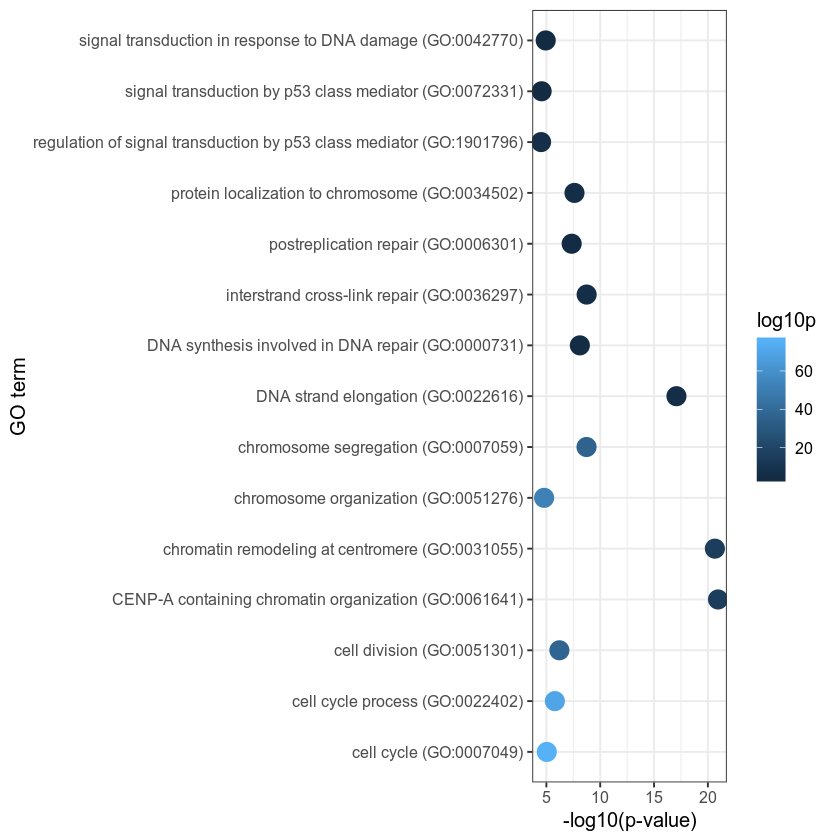

In [13]:
d_plot <- ggplot(fig1A, aes_string(x="term", 
                                   y="fold_enrichment", 
                                   colour="log10p")) +
          geom_point(size=5) +
          coord_flip() +
          theme_bw(base_size=12) +
          ylab('-log10(p-value)') +
          xlab('GO term')
d_plot
ggsave('../Figures/Figure1/Figure1A_dot.pdf')

Saving 6.67 x 6.67 in image


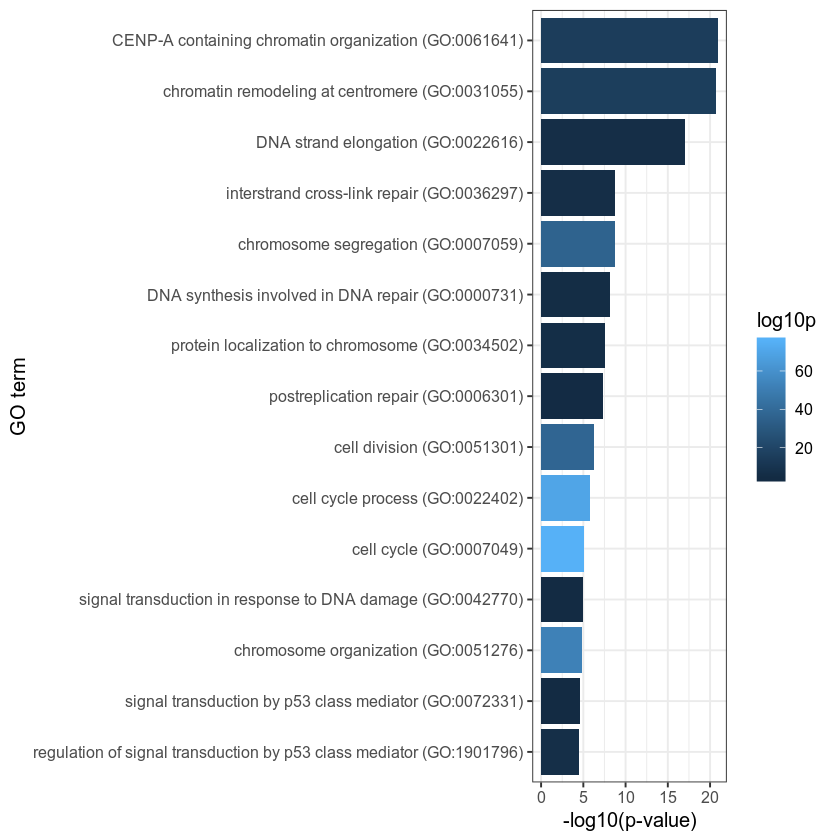

In [12]:
p_plot <- ggplot(fig1A,  aes_string(x=paste0("reorder(","term",", fold_enrichment)"), y="fold_enrichment", fill="log10p")) +
geom_col() +
coord_flip() +
theme_bw(base_size=12) +
ylab('-log10(p-value)')+
xlab('GO term')
p_plot
ggsave('../Figures/Figure1/Figure1A_bar.pdf')

In [19]:
fig3A <- fread('../data/data_for_figures//Figure3A_splicing_geneontology.tsv')
colnames(fig3A) <- c("term", 'reflist', "fold_enrichment", "upload_1 (FDR)")
fig3A$log10p = -log10(fig3A[, 'upload_1 (FDR)'])
fig3A

term,reflist,fold_enrichment,upload_1 (FDR),log10p
<chr>,<int>,<dbl>,<dbl>,<dbl>
viral transcription (GO:0019083),114,6.15,3.47e-06,5.459671
translational initiation (GO:0006413),146,5.34,4.24e-06,5.372634
positive regulation of endopeptidase activity (GO:0010950),168,3.71,2.75e-03,2.560667
nucleobase-containing compound catabolic process (GO:0034655),406,3.07,3.19e-05,4.496209
histone modification (GO:0016570),367,2.87,5.81e-04,3.235824
ncRNA processing (GO:0034470),383,2.75,1.12e-03,2.950782
mRNA metabolic process (GO:0016071),683,2.45,7.40e-05,4.130768
RNA metabolic process (GO:0016070),1669,2.01,1.47e-06,5.832683
RNA processing (GO:0006396),864,2.25,8.24e-05,4.084073


Saving 6.67 x 6.67 in image


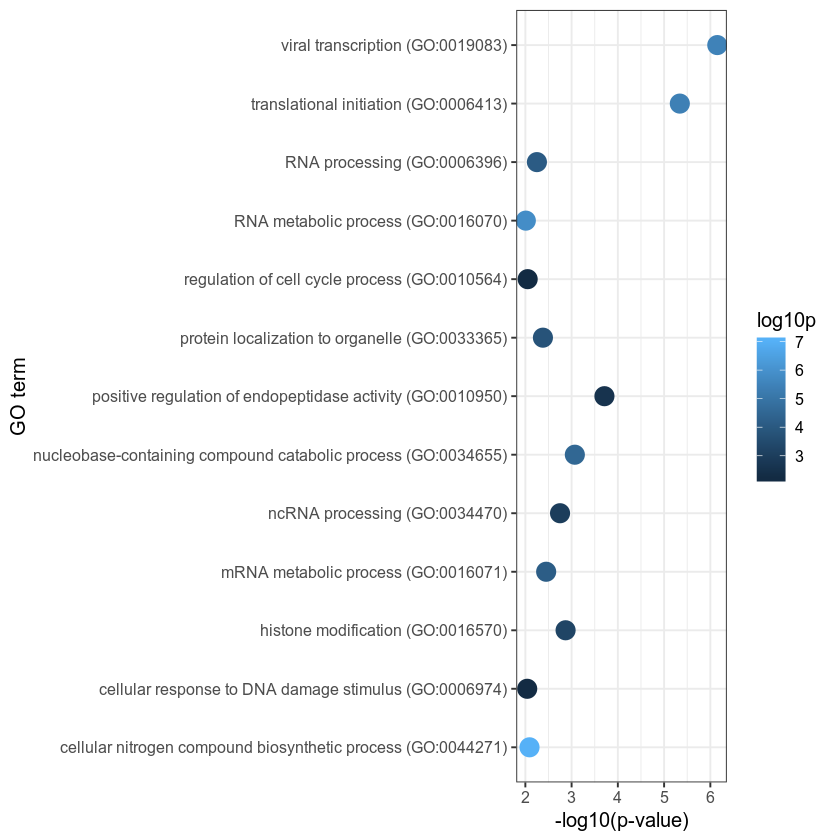

In [20]:
d_plot <- ggplot(fig3A, aes_string(x="term", 
                                   y="fold_enrichment", 
                                   colour="log10p")) +
          geom_point(size=5) +
          coord_flip() +
          theme_bw(base_size=12) +
          ylab('-log10(p-value)') +
          xlab('GO term')
d_plot
ggsave('../Figures/Figure3/Figure3A_dot.pdf')

Saving 6.67 x 6.67 in image


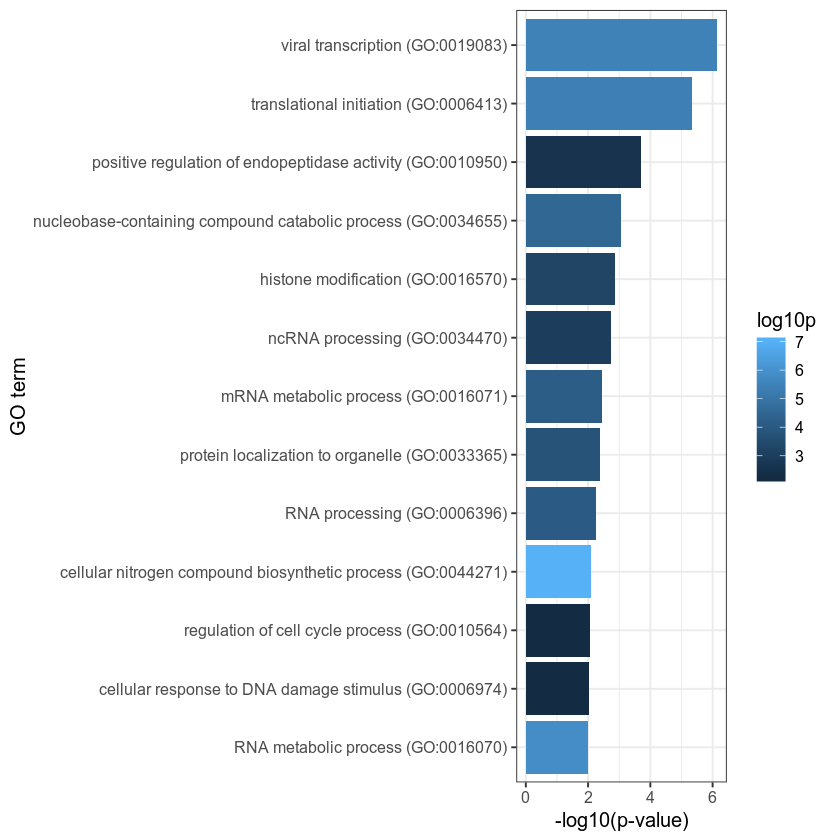

In [21]:
p_plot <- ggplot(fig3A,  aes_string(x=paste0("reorder(","term",", fold_enrichment)"), y="fold_enrichment", fill="log10p")) +
geom_col() +
coord_flip() +
theme_bw(base_size=12) +
ylab('-log10(p-value)')+
xlab('GO term')
p_plot
ggsave('../Figures/Figure3/Figure3A_bar.pdf')

In [24]:
fig5A <- fread('../data/data_for_figures/Figure5A_TE_geneontology.tsv')
colnames(fig5A) <- c("term",  "fold_enrichment", "upload_1 (FDR)")
fig5A$log10p = -log10(fig5A[, 'upload_1 (FDR)'])
fig5A

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
viral transcription (GO:0019083),62.43,1.22e-26,25.913640
"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)",62.28,1.55e-27,26.809668
translational initiation (GO:0006413),53.62,1.85e-27,26.732828
organic cyclic compound metabolic process (GO:1901360),3.04,8.33e-07,6.079355
translation (GO:0006412),22.52,3.60e-24,23.443697
cytoplasmic translation (GO:0002181),35.59,3.83e-07,6.416801
rRNA metabolic process (GO:0016072),12.27,5.85e-05,4.232844
mRNA metabolic process (GO:0016071),11.46,3.52e-15,14.453457
regulation of translation (GO:0006417),9.36,9.09e-05,4.041436


Saving 6.67 x 6.67 in image


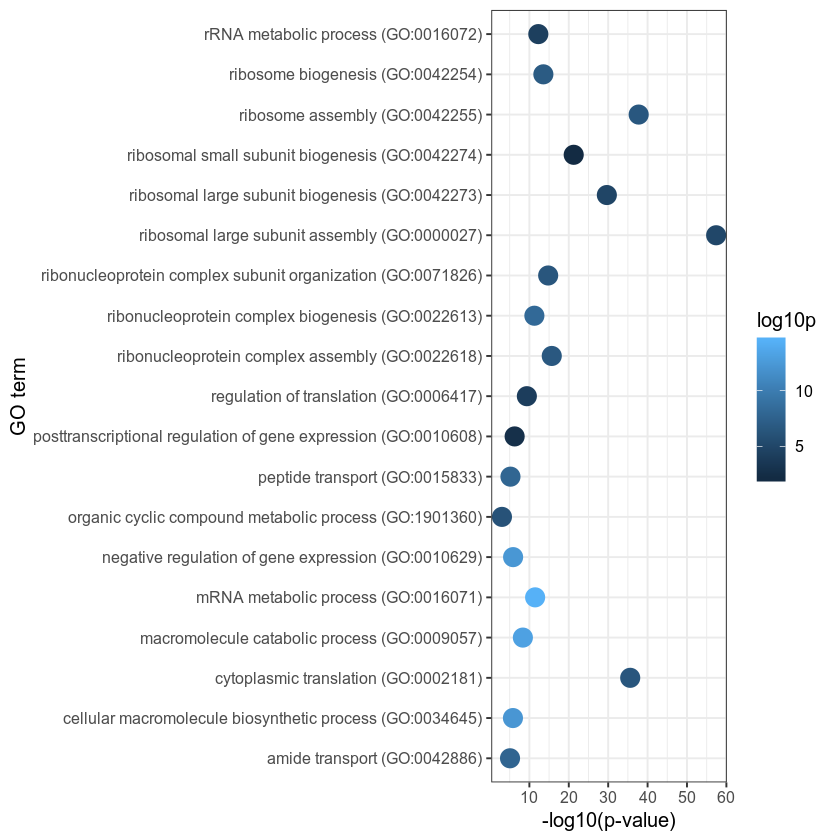

In [30]:
d_plot <- ggplot(subset(fig5A, fig5A$log10p<20), aes_string(x="term", 
                                   y="fold_enrichment", 
                                   colour="log10p")) +
          geom_point(size=5) +
          coord_flip() +
          theme_bw(base_size=12) +
          ylab('-log10(p-value)') +
          xlab('GO term')
d_plot
ggsave('../Figures/Figure5/Figure5A_dot.pdf')

Saving 6.67 x 6.67 in image


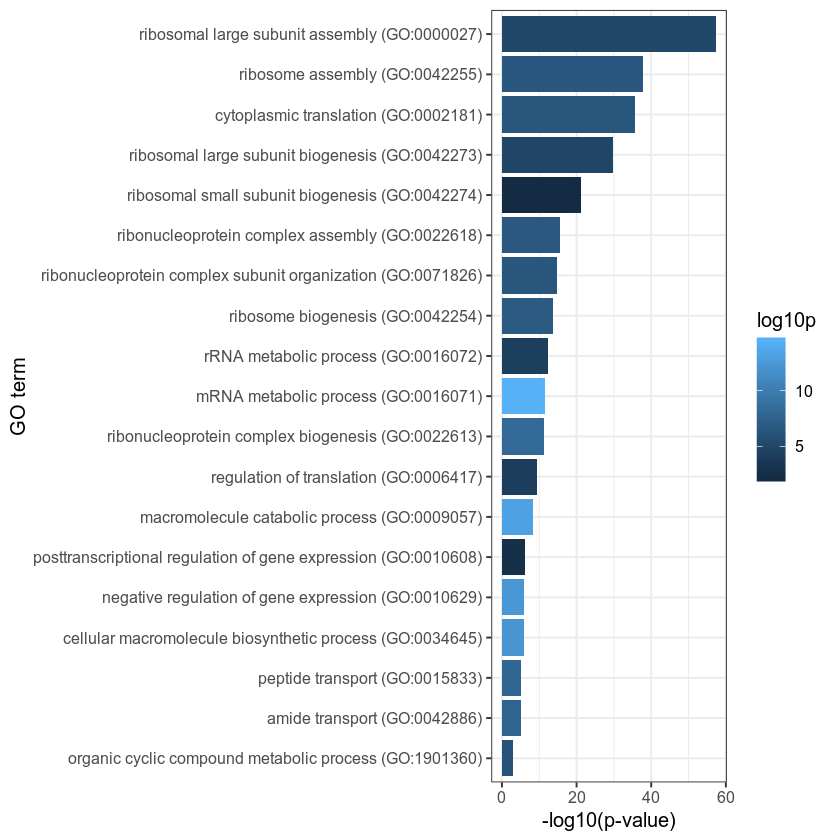

In [29]:
p_plot <- ggplot(subset(fig5A, fig5A$log10p<20),  aes_string(x=paste0("reorder(","term",", fold_enrichment)"), y="fold_enrichment", fill="log10p")) +
geom_col() +
coord_flip() +
theme_bw(base_size=12) +
ylab('-log10(p-value)')+
xlab('GO term')
p_plot
ggsave('../Figures/Figure5/Figure5A_bar.pdf')

In [28]:
subset(fig5A, fig5A$log10p<20)

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
organic cyclic compound metabolic process (GO:1901360),3.04,8.33e-07,6.079355
cytoplasmic translation (GO:0002181),35.59,3.83e-07,6.416801
rRNA metabolic process (GO:0016072),12.27,5.85e-05,4.232844
mRNA metabolic process (GO:0016071),11.46,3.52e-15,14.453457
regulation of translation (GO:0006417),9.36,9.09e-05,4.041436
macromolecule catabolic process (GO:0009057),8.35,7.23e-14,13.140862
posttranscriptional regulation of gene expression (GO:0010608),6.26,2.06e-03,2.686133
negative regulation of gene expression (GO:0010629),5.87,5.59e-13,12.252588
cellular macromolecule biosynthetic process (GO:0034645),5.83,6.41e-13,12.193142
